# Projet : Classification multimodale de produits e-commerce - Rakuten

## 1. Exploration et Audit des données :

### 1.1 Données Texte :

Nous allons commencer par explorer les données texte de notre Dataset. Tout d'abord on importe le fichier X_train, qui contient nos variables explicatives et on affiche les 5 premières lignes.

In [86]:
#Import
import pandas as pd
#Chargement des données :
df=pd.read_csv('X_train_update.csv',index_col=0)
#Affichage 5 premières lignes :
df.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


Ensuite, on observe les informations, descriptions, ainsi que la dimension du Dataframe

In [92]:
#informations dataframe et type variable :
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


Toutes nos variables sont catégorielles. On constate que la variable description a beaucoup de valeur vide.

In [95]:
# Affichage description des variables
df.describe()

,productid,imageid
count,8.491600e+04,8.491600e+04
mean,2.555468e+09,1.152691e+09
std,1.588656e+09,1.751427e+08
min,1.839120e+05,6.728400e+04
25%,6.760519e+08,1.056269e+09
50%,3.190506e+09,1.213354e+09
75%,3.995599e+09,1.275646e+09
max,4.252012e+09,1.328824e+09


On ne peut rien tirer du tableau ci-dessus, car il s'agit de variables catégorielles uniques qui permettent de relier nos variables descriptions à nos variables images.

In [96]:
#Affiche les dimensions :
df.shape

(84916, 4)

Notre jeu de données est très volumineux, et nous n'avons que 4 variables explicatives.

Nous allons maintenant nous pencher sur les valeurs vides de la variable Description.

In [98]:
#Calcul taux des valeurs null de la colonne description:
#somme valeur null :
somme_descr_null = df.description.isnull().sum()
print("Il y a" , somme_descr_null , "valeurs vides dans la colonne description.")
#somme valeur non null :
nbr_descr_Nnull = df.description.count()
print("Il y a" , nbr_descr_Nnull , "valeurs non vides dans la colonne description.")
#total : 
total = somme_descr_null + nbr_descr_Nnull
#taux :
taux = somme_descr_null * 100 / total
print("Il y a" , taux , "% de valeurs vides dans la colonne description.")

Il y a 29800 valeurs vides dans la colonne description.
Il y a 55116 valeurs non vides dans la colonne description.
Il y a 35.09350416882566 % de valeurs vides dans la colonne description.


Il y a 35% de valeurs vides dans notre colonne description ce qui est énorme. Nous verrons plus tard comment nous allons traiter cela.

On va maintenant se pencher sur la distribution des valeurs de nos variables explicatives .

In [99]:
#Nombre de fois qu'apparait chaque valeur désignation :
data['designation'].value_counts().head()

5d Broderie Peintures Strass Diamant Bricolage Pasted Peinture Point De Croix       76
Simple Linen Creative Belle Oreiller Taie D'oreiller Taie D'oreiller Car Cover      28
Cotton Linen Place Décoratifs Pour La Maison Coussin Case Canapé Taille Coussin     25
Imprimer Taie Polyester Canapé Coussin Car Cover Home Decor                         22
Joyeuse Saint-Valentin Jetez Taie D'oreiller Sweet Love Coussin Carré Couverture    21
Name: designation, dtype: int64

Nous avons 98% de valeur unique.

In [100]:
#Nombre de fois qu'apparait chaque valeur description :
data['description'].value_counts().head()

<br>Attention !!! Ce produit est un import  si les informations 'langues' et 'sous-titres' n'apparaissent pas sur cette fiche produit c'est que l'éditeur ne nous les a pas fournies. Néanmoins dans la grande majorité de ces cas il n'existe ni langue ni sous titres en français sur ces imports.    252
Taille: En format A5 (144 cm x 21 cm) Caractéistique: -Excellente durabilité avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualitévous pouvez y érire facilement                                                                                      232
Taille: En format A5 (144 cm x 21 cm) Caracteristique: -Excellente durabilite avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualite:  ecrire facilement sur et assez epaisse.                                                                         189
Taille: En format A5 (144 cm x 21 cm) Caract?istique: -Excellente durabilit?avec couverture solide d

Nous avons également 98% de valeur unique.

In [103]:
#Nombre de fois qu'apparait chaque valeur productid :
df.productid.value_counts(normalize = True)

1991504589    0.000012
291502762     0.000012
3857173164    0.000012
202758830     0.000012
3855209135    0.000012
                ...   
4003847257    0.000012
4063345821    0.000012
3413442858    0.000012
2141070700    0.000012
4159176704    0.000012
Name: productid, Length: 84916, dtype: float64

In [102]:
#Nombre de fois qu'apparait chaque valeur imageid :
df.imageid.value_counts(normalize = True)

1252659198    0.000012
1044083035    0.000012
1292536132    0.000012
1188462917    0.000012
1321638214    0.000012
                ...   
1269881950    0.000012
1018399707    0.000012
1264956380    0.000012
1191822606    0.000012
922355713     0.000012
Name: imageid, Length: 84916, dtype: float64

On remarque que toutes les valeurs de nos variables productid et imagid sont uniques. Ce qui est normal puisque chaque valeur représente une image de chaque produit.

On va maintenant essayer d'analyser plus en détail les valeurs de notre variable cible, on commence par chargé notre fichier Y_train. Puis on affiche les 5 premières lignes.

In [105]:
#Chargement des données (variable cibles) :
y=pd.read_csv('Y_train_CVw08PX.csv',index_col=0)
y.head()

,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [125]:
#Valeurs uniques que prend la variable prdtypecode :
import numpy as np
list_cat = y.prdtypecode.unique()
print(list_cat)
#Nombre total catégories :
ctg = pd.DataFrame(list_cat, columns = ["Cat"])
tot = ctg.Cat.count()
print("Nous avons", tot , "catégories au total.")

[  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301]
Nous avons 27 catégories au total.


Notre variable cible possède 27 Catégories différentes.

In [127]:
#On va trier nos valeurs :
list_trié = sorted(list_cat)
list_trié

[10,
 40,
 50,
 60,
 1140,
 1160,
 1180,
 1280,
 1281,
 1300,
 1301,
 1302,
 1320,
 1560,
 1920,
 1940,
 2060,
 2220,
 2280,
 2403,
 2462,
 2522,
 2582,
 2583,
 2585,
 2705,
 2905]

Avant de poursuivre notre analyse nous allons déduire ce que représente chaque prdtypecode afin de mieux comprendre la répartition du jeu de données.


In [76]:
#Descriptions des catégories :
data[data['prdtypecode']==1560].head(30)
#1560 = Meuble et literie Maison
data[data['prdtypecode']==1920].head(30)
#1920 = linge de maison 
data[data['prdtypecode']==1940].head(30)
#1940 = alimentation
data[data['prdtypecode']==2060].head(30)
#2060 = Décoration
data[data['prdtypecode']==2220].head(30)
#2220 = animalerie
data[data['prdtypecode']==2280].head(30)
#2280 = journal et magazine
data[data['prdtypecode']==2403].head(30)
#2403 Livres d'apprentissages (il y a aussi des magazine ..)
data[data['prdtypecode']==2462].head(30)
#2462 = Consoles et jeux
data[data['prdtypecode']==2522].head(30)
#2522 = papeterie
data[data['prdtypecode']==2582].head(30)
#2582 = jardin et piscine
data[data['prdtypecode']==2583].head(30)
#2583 = jardin et piscine 2
data[data['prdtypecode']==2585].head(30)
#2585 Jardin et piscine : outillage de jardin
data[data['prdtypecode']==2705].head(30)
#2705 = livres
data[data['prdtypecode']==2905].head(30)
#2905 = jeux videos
data[data['prdtypecode']==10].head(30)
#10= Livres
data[data['prdtypecode']==40].head(30)
#40=Jeux vidéos
data[data['prdtypecode']==50].head(30)
#50=Matériel gaming
data[data['prdtypecode']==60].head(30)
#60=Consoles de jeux
data[data['prdtypecode']==1140].head(30)
#1140=Figurines/accessoires
data[data['prdtypecode']==1160].head(30)
#1160=Cartes de collection
data[data['prdtypecode']==1180].head(50)
#1180=Figurines/accessoire2
data[data['prdtypecode']==1280].head(50)
#1280=Jouets enfants(peluche,poupées...)
data[data['prdtypecode']==1281].head(50)
#1281=jeux de société
data[data['prdtypecode']==1300].head(50)
#1300=jouets avions/voitures
data[data['prdtypecode']==1301].head(50)
#1301=Jeux de société(fléchettes,billard), chaussures bébé
data[data['prdtypecode']==1302].head(50)
#1302 = Figurines/jeux plein air
data[data['prdtypecode']==1320].head(50)
#1320=Accessoires bébé/petite enfance(poussettes, jeux, etc.)
data[data['prdtypecode']==1560].head(30)
#1560 = Meuble, accessoires et literie Maison

,designation,description,productid,imageid,prdtypecode
10,Eames Inspired Sxw Chair - Pink - Black,The timeless DSW seat can now be paired with m...,1915836983,1111840281,1560
11,Fauteuil Chesterfield Brenton 100% Cuir De Buf...,Canapé et fauteuil chesterfield en cuir antiqu...,4127967621,1295816984,1560
14,Matelas Mémoire De Forme 180x200 X 20 Cm Très ...,MATELAS:<br />Â· Accueil : Ferme .<br />Â· Sou...,4108914287,1292441752,1560
32,2 Cagettes De Rangement Happy Life - 40 X 30 C...,Organisez et rangez de manière scandinave votr...,3079667218,1195260111,1560
78,Crochets Plafond Crochets Coupe À Vis Des Croc...,Plafond Crochets Coupe à vis des crochets Plan...,4182265443,1310653112,1560
85,Lot De 6 Chaises De Salle À Manger Style Indus...,<p>Lot de 6 chaises en métal robuste et intemp...,969179882,1050686036,1560
87,Sacs De Couverture De Bouteille De Bière Décor...,Bouteille de bière Couverture Sacs Décoration ...,4182233005,1310308772,1560
95,Magasin Zhufuwme:English Alphabet Coussin Impr...,English Alphabet Coussin Imprimer Coussin Fleu...,4044463867,1280265865,1560
119,Bas De Noël Chaussettes Père Noël Candy Bag Ca...,Bas de Noël Chaussettes Père Noël Candy Bag ca...,3873228357,1256092774,1560
132,3pcs Motif Saint Valentin Antiderapant Abattan...,Motif du jour de 3PCS Valentine Antiderapant s...,4170895440,1307498914,1560


Nous avons analysé classe par classe et avons déduit grâce aux variables Désignations et Descriptions ce que représentent les différentes catégories. Ci-dessus un exemple avec le prdtypecode = 1560. On voit bien qu'il s'agit de Meuble, Accessoires et literie Maison.

Maintenant que nous savons à quoi correspond chaque catégorie nous allons poursuivre notre analyse.
Tout d'abord nous allons vérifier si les données sont équilibrées.

In [129]:
#Nombres de produits dans chaque catégories :
y.prdtypecode.value_counts()

2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: prdtypecode, dtype: int64

In [130]:
#Nombre de produit en pourcentage dans chaque catégorie :
y.prdtypecode.value_counts(normalize = True)

2583    0.120225
1560    0.059741
1300    0.059412
2060    0.058799
2522    0.058752
1280    0.057351
2403    0.056220
2280    0.056055
1920    0.050674
1160    0.046552
1320    0.038167
10      0.036695
2705    0.032514
1140    0.031455
2582    0.030489
40      0.029535
2585    0.029394
1302    0.029335
1281    0.024377
50      0.019796
2462    0.016734
2905    0.010269
60      0.009798
2220    0.009704
1301    0.009504
1940    0.009456
1180    0.008997
Name: prdtypecode, dtype: float64

Les catégories sont relativement déséquilibrées, attention aux catégories sous_représentées(moins de 1% du total).

On représente graphiquement le nombre de produit par catégorie : 

C:\Users\kaout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prdtypecode', ylabel='count'>

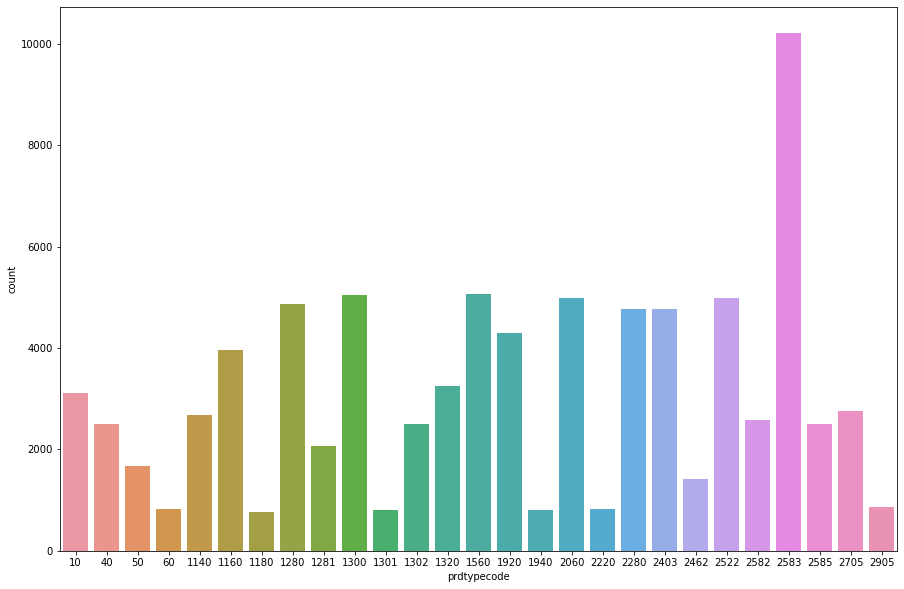

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,10))
sns.countplot(y.prdtypecode)

On constate bien graphiquemnt le déséquilibre entre les différentes classes.
Les types-codes= 60(Consoles de jeux),1180(Figurines/accessoire2),1301(Jeux de société(fléchettes,billard),1940(alimentation),2220(animalerie), 2462(Consoles et jeux), 2905(jeux videos) sont sous-représentés.

Le type-code = 2583(Jardin et piscine) est sur-représenté.

Maintenant nous allons représenter graphiquement les catégories ayant des valeurs vides dans la colonne Description.

C:\Users\kaout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


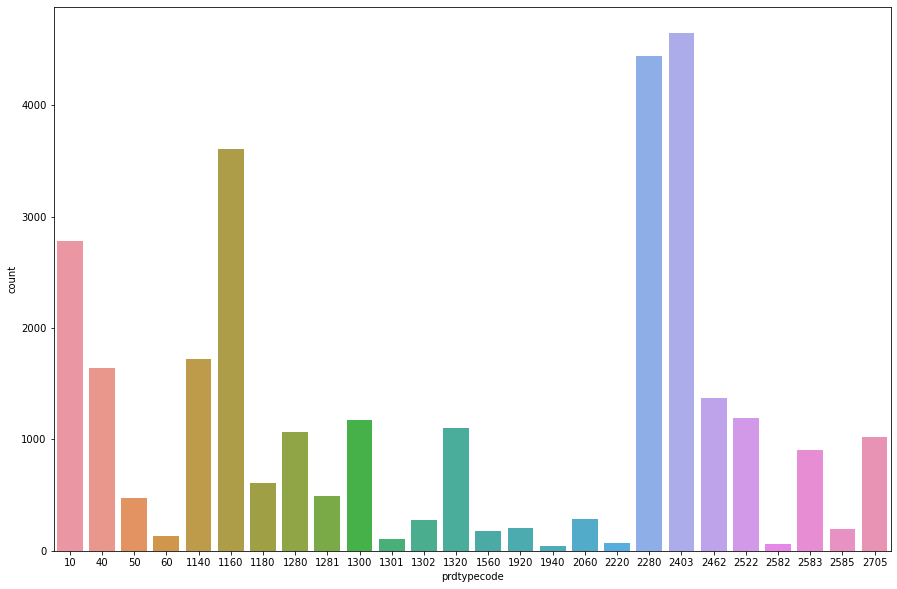

In [66]:
data=df.join(y)
vide=data[data.description.isnull()]
fig=plt.figure(figsize=(15,10))
sns.countplot(vide.prdtypecode);

Certaines catégories ont une  proportion de cellules vides dans la variable description relativement importantes,étant donnée qu'il y a peu de features, celà pourrait nuire à la qualité de la prévision.
Catégories princpalement concernées : 10(Livres), 1140(Figurines/accessoires),1160 (Cartes de collection),2280 ( journal et magazine),2403 (Livres d'apprentissages).
On peut remplacer les cellules vides de description par les données de designation quand c'est possible.
Par exemple pour 2280,2403 qui represente des livres et magasines cela est possible.
On peut également fusionner les 2 cellules pour n'en former qu'une.
Nous allons tester ces 2 méthodes lors de l'étape de la modélisation.

### 1.1 Données images :

On passe maintenant à l'analyse des données images.

Nous allons prendre une image au hasard et l'afficher, puis voir ses dimensions.

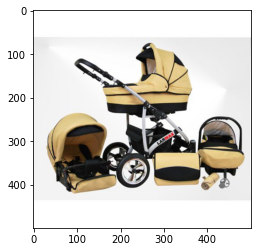

In [179]:
#Lecture image :
img_test=plt.imread('images\images\image_train\image_1102363799_product_845432910.jpg')
#Affichage image :
plt.imshow(img_test)

In [180]:
#Dimension de l'image :
img_test.shape

(500, 500, 3)

Les dimensions indiquent 500x500 pour la taille et canal 3 pour indiquer que c'est en couleur. En effet toutes les images de notre jeu de donnée sont de tailles 500x500 (pixels) et sont en couleurs. Nous verrons lors des prochaines étapes que cette dimension est beaucoup trop grande pour pouvoir travailler sur les images, de même pour le fait que ce soit en couleur.

Maintenant, nous allons afficher pour chaque catégories 3 ou 4 images pour avoir un aperçu. Pour cela on commence par créer une colonne image_name  qui récupère les valeurs de productid et imageid de chaque produit et ainsi on reconstitue le nom des images tel qu'il apparait dans notre dossier image_train.

In [159]:
#Création de la variable image_name :
data['image_name'] = data.astype('str').apply(lambda row: 'image_'+row['imageid']+'_product_'+row['productid']+'.jpg',axis = 1)
data.head()

,designation,description,productid,imageid,prdtypecode,image_name
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg


- Organisation, Meuble et literie Maison - Type code = 1560 

In [181]:
#Exemples d’image pour la classe 1560 :
data[data['prdtypecode']==1560].head()
#1560 = Organisation, Meuble et literie Maison

,designation,description,productid,imageid,prdtypecode,image_name
10,Eames Inspired Sxw Chair - Pink - Black,The timeless DSW seat can now be paired with m...,1915836983,1111840281,1560,image_1111840281_product_1915836983.jpg
11,Fauteuil Chesterfield Brenton 100% Cuir De Buf...,Canapé et fauteuil chesterfield en cuir antiqu...,4127967621,1295816984,1560,image_1295816984_product_4127967621.jpg
14,Matelas Mémoire De Forme 180x200 X 20 Cm Très ...,MATELAS:<br />Â· Accueil : Ferme .<br />Â· Sou...,4108914287,1292441752,1560,image_1292441752_product_4108914287.jpg
32,2 Cagettes De Rangement Happy Life - 40 X 30 C...,Organisez et rangez de manière scandinave votr...,3079667218,1195260111,1560,image_1195260111_product_3079667218.jpg
78,Crochets Plafond Crochets Coupe À Vis Des Croc...,Plafond Crochets Coupe à vis des crochets Plan...,4182265443,1310653112,1560,image_1310653112_product_4182265443.jpg


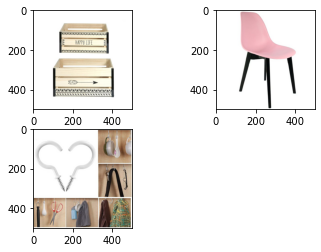

In [161]:
#lecture image
img_1560_1 = plt.imread('images\images\image_train\image_1195260111_product_3079667218.jpg')
img_1560_2 = plt.imread('images\images\image_train\image_1111840281_product_1915836983.jpg')
img_1560_3 = plt.imread('images\images\image_train\image_1310653112_product_4182265443.jpg')
#Affichage image :
plt.subplot(221).imshow(img_1560_1)
plt.subplot(222).imshow(img_1560_2)
plt.subplot(223).imshow(img_1560_3)


- Linge de maison - Type code = 1920

In [162]:
data[data['prdtypecode']==1920].head()
#1920 = linge de maison 

,designation,description,productid,imageid,prdtypecode,image_name
13,Paire De Voilages Imprimés Fantaisie,Paire de voilages droits fantaisie qui mettra ...,1882164320,1109088140,1920,image_1109088140_product_1882164320.jpg
38,4pcs Décor Coussin Indépendance Style Jeter Co...,4pcs Décor Coussin Independence Day Style de T...,4012748163,1276344493,1920,image_1276344493_product_4012748163.jpg
45,Rideau A Oeillets Plastique Polyester Uni Esse...,rêt-à-poser ce rideau s'installe facilement et...,2333136838,1136619798,1920,image_1136619798_product_2333136838.jpg
92,Coussin En Peluche Canapé Taille Coussin Throw...,NaN,4159399664,1303739592,1920,image_1303739592_product_4159399664.jpg
103,Canapé Mignon Lit Pour Chat Accueil Décoration...,Chien mignon Canapé-lit Décoration Pillow Fest...,4004145763,1275336103,1920,image_1275336103_product_4004145763.jpg


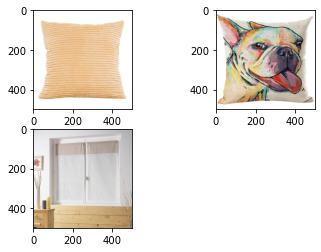

In [163]:
img_1920_1 = plt.imread('images\images\image_train\image_1303739592_product_4159399664.jpg')
img_1920_2 = plt.imread('images\images\image_train\image_1275336103_product_4004145763.jpg')
img_1920_3 = plt.imread('images\images\image_train\image_1109088140_product_1882164320.jpg')
plt.subplot(221).imshow(img_1920_1)
plt.subplot(222).imshow(img_1920_2)
plt.subplot(223).imshow(img_1920_3)

- Alimentation - Type code = 1940

In [164]:
data[data['prdtypecode']==1940].head()
#1940 = alimentation

,designation,description,productid,imageid,prdtypecode,image_name
200,Lot De 5 Sachet Chewing Gum Pastèque Fini 100g...,Lot de 5 Sachet Chewing Gum Pastèque Fini 100g...,4151269724,1301255126,1940,image_1301255126_product_4151269724.jpg
203,Tassimo Jacobs Espresso Rainforest Alliance Vé...,Tassimo Jacobs Espresso Rainforest Alliance Vé...,4055997671,1282285967,1940,image_1282285967_product_4055997671.jpg
406,Dolce Gusto Espresso 16 Caps. 96g,DOLCE GUSTO Espresso 16 Caps. 96g - 16 capsule...,1466897199,1082357413,1940,image_1082357413_product_1466897199.jpg
442,Twinings Gunpowder Thé Vert Menthe - Vrac/Boit...,<br />,2572664424,1150288994,1940,image_1150288994_product_2572664424.jpg
702,Haribo Gingembre-Citron Bonbons Bonbons Gélifi...,Les bonbons Haribo gingembre-citron sont des b...,4056001141,1282291447,1940,image_1282291447_product_4056001141.jpg


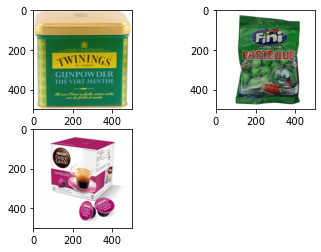

In [137]:
img_1940_1 = plt.imread('images\images\image_train\image_1150288994_product_2572664424.jpg')
img_1940_2 = plt.imread('images\images\image_train\image_1301255126_product_4151269724.jpg')
img_1940_3 = plt.imread('images\images\image_train\image_1082357413_product_1466897199.jpg')
plt.subplot(221).imshow(img_1940_1)
plt.subplot(222).imshow(img_1940_2)
plt.subplot(223).imshow(img_1940_3)

- Décoration - Type code = 2060

In [165]:
data[data['prdtypecode']==2060].head()
#2060 = Décoration

,designation,description,productid,imageid,prdtypecode,image_name
30,Lampe De Lecture Rechargeable Led Lampe De Bea...,Nom de la marque:SYTH<br />Ampoules incluses:O...,4198487181,1313675704,2060,image_1313675704_product_4198487181.jpg
35,Decoration De Noel Christmas Snowman Kitchen T...,Christmas Snowman Kitchen Table Chair Covers H...,4211197055,1317753478,2060,image_1317753478_product_4211197055.jpg
36,30 Spots Encastrable Orientable Blanc Avec Gu1...,<b>Lot de 30 Spots encastrable orientable BLAN...,3847254406,1264434293,2060,image_1264434293_product_3847254406.jpg
67,Happy Halloween Sorcière Accueil Stickers Mura...,Happy Halloween Sorcière Accueil amovible Wall...,4200117001,1313789346,2060,image_1313789346_product_4200117001.jpg
77,Boite A Savons Metal Collection Moulin Rouge C...,NaN,684292602,1035262984,2060,image_1035262984_product_684292602.jpg


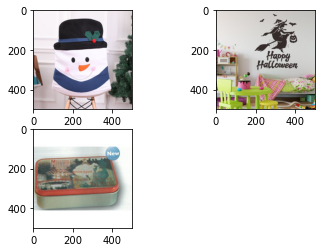

In [141]:
img_2060_1 = plt.imread('images\images\image_train\image_1317753478_product_4211197055.jpg')
img_2060_2 = plt.imread('images\images\image_train\image_1313789346_product_4200117001.jpg')
img_2060_3 = plt.imread('images\images\image_train\image_1035262984_product_684292602.jpg')
plt.subplot(221).imshow(img_2060_1)
plt.subplot(222).imshow(img_2060_2)
plt.subplot(223).imshow(img_2060_3)

- Animalerie - Type code = 2220

In [166]:
data[data['prdtypecode']==2220].head()
#2220 = animalerie

,designation,description,productid,imageid,prdtypecode,image_name
82,Distributeur De Nourriture Tx2,Pour chat et petit chien. Grâce au timer intég...,532980611,1227615603,2220,image_1227615603_product_532980611.jpg
320,Chaîne Créative De Fission De Pied De Perroque...,<p><b>La description:</b></p><br /><p> 100% ne...,4183696764,1313629697,2220,image_1313629697_product_4183696764.jpg
338,Mode Pet Keep Warm Amour Decorationcoat Chien ...,Mode Pet Garder au chaud l&#39;amour Decoratio...,4187459181,1311500237,2220,image_1311500237_product_4187459181.jpg
354,Matelas Pour Chiens Taille M Beige,<p>Ce matelas pour chiens donnera à vos animau...,3971616496,1270372881,2220,image_1270372881_product_3971616496.jpg
355,Ruban Multicolre Topline Plus Vert 40mm,AKO TopLine Plus garantit une bonne conductivi...,1631551337,1095049953,2220,image_1095049953_product_1631551337.jpg


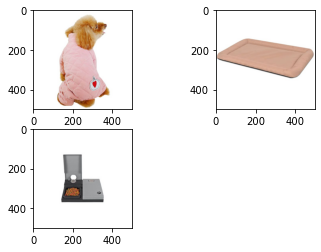

In [143]:
img_2220_1 = plt.imread('images\images\image_train\image_1311500237_product_4187459181.jpg')
img_2220_2 = plt.imread('images\images\image_train\image_1270372881_product_3971616496.jpg')
img_2220_3 = plt.imread('images\images\image_train\image_1227615603_product_532980611.jpg')
img_2280 = plt.imread('images\images\image_train\image_393356830_product_5862738.jpg')
plt.subplot(221).imshow(img_2220_1)
plt.subplot(222).imshow(img_2220_2)
plt.subplot(223).imshow(img_2220_3)

- Journal et magazine - Type code = 2280

In [167]:
data[data['prdtypecode']==2280].head()
#2280 = journal et magazine

,designation,description,productid,imageid,prdtypecode,image_name
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg
5,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,NaN,5862738,393356830,2280,image_393356830_product_5862738.jpg
19,Monde Illustre (Le) N° 3083 Du 20/01/1917 - L'...,NaN,570628142,1027257229,2280,image_1027257229_product_570628142.jpg
28,Univers (L') N° 249 Du 12/09/1854 - France - P...,NaN,570663184,1027317460,2280,image_1027317460_product_570663184.jpg
44,Diagrammes N° 26 Du 01/04/1959 - Le Siecle Du ...,NaN,569725834,1027001857,2280,image_1027001857_product_569725834.jpg


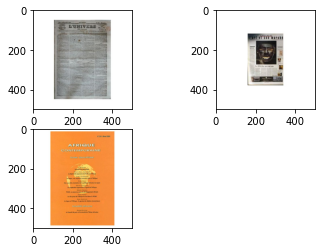

In [144]:
img_2280_1 = plt.imread('images\images\image_train\image_1027317460_product_570663184.jpg')
img_2280_2 = plt.imread('images\images\image_train\image_1008141237_product_436067568.jpg')
img_2280_3 = plt.imread('images\images\image_train\image_393356830_product_5862738.jpg')
plt.subplot(221).imshow(img_2280_1)
plt.subplot(222).imshow(img_2280_2)
plt.subplot(223).imshow(img_2280_3)

- Livres - Type code = 2403

In [168]:
data[data['prdtypecode']==2403].head()
#2403 Livres 

,designation,description,productid,imageid,prdtypecode,image_name
16,Walter Scott Oeuvres Complètes Tomes 3456 10 E...,NaN,3735707499,1239242410,2403,image_1239242410_product_3735707499.jpg
51,"One Piece Log 36 ""Impel Down Partie 2""",NaN,4086457567,1288958984,2403,image_1288958984_product_4086457567.jpg
54,Fate/Zero - Lot Mangas - Tome 1 À 5,NaN,3691441491,1234869213,2403,image_1234869213_product_3691441491.jpg
57,Lot De 5 Livres Grans Peintres,NaN,1810701779,1102910727,2403,image_1102910727_product_1810701779.jpg
61,Lot Pf38 - 15 Marque-Pages (Illustrations Vint...,NaN,2255444083,1133554532,2403,image_1133554532_product_2255444083.jpg


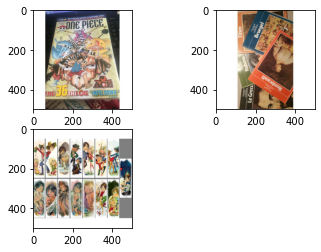

In [145]:
img_2403_1 = plt.imread('images\images\image_train\image_1288958984_product_4086457567.jpg')
img_2403_2 = plt.imread('images\images\image_train\image_1102910727_product_1810701779.jpg')
img_2403_3 = plt.imread('images\images\image_train\image_1133554532_product_2255444083.jpg')
plt.subplot(221).imshow(img_2403_1)
plt.subplot(222).imshow(img_2403_2)
plt.subplot(223).imshow(img_2403_3)

- Consoles et jeux - Type code = 2462

In [169]:
data[data['prdtypecode']==2462].head()
#2462 = Consoles et jeux

,designation,description,productid,imageid,prdtypecode,image_name
25,Dsi + Chargeur + Sacoche + 12 Jeux,NaN,211334790,948608572,2462,image_948608572_product_211334790.jpg
71,Xbox One 500 Giga Avc 3jeux Une Manette,NaN,1366398939,1076659035,2462,image_1076659035_product_1366398939.jpg
86,Xbox 360 Élite Noire 250go + 5 Jeux + Une Mane...,NaN,298737347,991347135,2462,image_991347135_product_298737347.jpg
238,Clementoni - 62580.2 - Jouet De Premier Age - ...,NaN,1692178656,1098685633,2462,image_1098685633_product_1692178656.jpg
324,Lot - Baldur&#39;S Gate - Dark Alliance Ii - 2...,NaN,3040165356,1186950504,2462,image_1186950504_product_3040165356.jpg


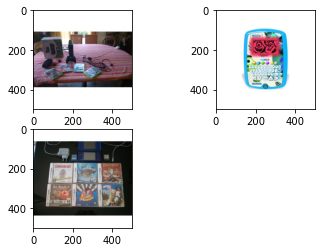

In [147]:
img_2462_1 = plt.imread('images\images\image_train\image_991347135_product_298737347.jpg')
img_2462_2 = plt.imread('images\images\image_train\image_1098685633_product_1692178656.jpg')
img_2462_3 = plt.imread('images\images\image_train\image_948608572_product_211334790.jpg')
plt.subplot(221).imshow(img_2462_1)
plt.subplot(222).imshow(img_2462_2)
plt.subplot(223).imshow(img_2462_3)

- Papeterie - Type code = 2522

In [170]:
data[data['prdtypecode']==2522].head()
#2522 = papeterie

,designation,description,productid,imageid,prdtypecode,image_name
7,Conquérant Sept Cahier Couverture Polypro 240 ...,CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès...,344240059,999581347,2522,image_999581347_product_344240059.jpg
15,Zenith Pince Agrafeuse 591 N°10 Coloris Noir,Pince agrafeuse 591 N°10. Capot en ABS. Dispos...,3718150116,1237257586,2522,image_1237257586_product_3718150116.jpg
17,Mod Podge Dishwasher Safe Gloss 8oz,NaN,2666371748,1156191369,2522,image_1156191369_product_2666371748.jpg
27,Faber-Castell Lot De 3 Crayons De Couleur Poly...,FABER-CASTELL Crayon de couleur POLYCHROMOS ve...,2536863974,1148154575,2522,image_1148154575_product_2536863974.jpg
33,Lindner 2365-2115ce Coin Case Nera Xl With 3 T...,Timeless elegance a clear design versatility f...,3817904723,1248853903,2522,image_1248853903_product_3817904723.jpg


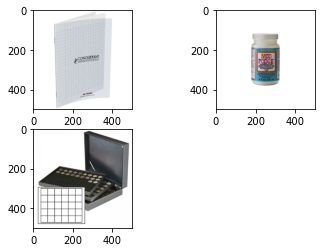

In [148]:
img_2522_1 = plt.imread('images\images\image_train\image_999581347_product_344240059.jpg')
img_2522_2 = plt.imread('images\images\image_train\image_1156191369_product_2666371748.jpg')
img_2522_3 = plt.imread('images\images\image_train\image_1248853903_product_3817904723.jpg')
plt.subplot(221).imshow(img_2522_1)
plt.subplot(222).imshow(img_2522_2)
plt.subplot(223).imshow(img_2522_3)

- Jardin et piscine - Type code = 2582

In [171]:
data[data['prdtypecode']==2582].head()
#2582 = jardin et piscine

,designation,description,productid,imageid,prdtypecode,image_name
9,Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...,Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m5...,3793572222,1245644185,2582,image_1245644185_product_3793572222.jpg
73,Pot Marina Eda - Diamètre 25 Cm - 6 L - Rubis,<b>Pot Marina Eda - Diamètre 25 cm - 6 l - Rub...,2823144007,1166636908,2582,image_1166636908_product_2823144007.jpg
100,Garcia De Pou Housse Pour Vin 12x23 Cm Glase A...,Fabriqué en acrylique - Mesure 12 cm de diamèt...,4223031202,1321747763,2582,image_1321747763_product_4223031202.jpg
249,30 Led Lampes Solaires Extérieur Etanche Ip65 ...,?Largement utilisé? Parfait pour utiliser sur ...,3863212856,1254576212,2582,image_1254576212_product_3863212856.jpg
266,Coussin Pour Banc De Jardin 985 Cm,Aspect : <br />Matériau principal : Polyester<...,3366179456,1208976070,2582,image_1208976070_product_3366179456.jpg


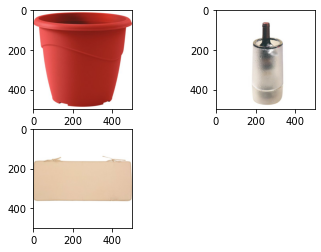

In [172]:
img_2582_1 = plt.imread('images\images\image_train\image_1166636908_product_2823144007.jpg')
img_2582_2 = plt.imread('images\images\image_train\image_1321747763_product_4223031202.jpg')
img_2582_3 = plt.imread('images\images\image_train\image_1208976070_product_3366179456.jpg')
plt.subplot(221).imshow(img_2582_1)
plt.subplot(222).imshow(img_2582_2)
plt.subplot(223).imshow(img_2582_3)

- Jardin et piscine 2 - Type code = 2583

In [173]:
data[data['prdtypecode']==2583].head()
#2583 = jardin et piscine 2

,designation,description,productid,imageid,prdtypecode,image_name
20,Kit de désinfection pour piscines enfants 20990,NaN,3936362802,1268740880,2583,image_1268740880_product_3936362802.jpg
39,Bouée gonflable River tube - OOGARDEN,Bouée gonflable River tube en PVC idéale pour ...,3147314797,1225887302,2583,image_1225887302_product_3147314797.jpg
53,Testeur électronique de pH,Utilisation du Testeur électronique de pHGrâce...,207151480,941622055,2583,image_941622055_product_207151480.jpg
58,Pompe de filtration Speck Badu 95,NaN,4128438373,1295960377,2583,image_1295960377_product_4128438373.jpg
64,AstralCom 1 CV Mono de DAB - Surpresseur piscine,Tension (V) : Monophasé - 230 V Puissance : 1...,1857269337,1105831362,2583,image_1105831362_product_1857269337.jpg


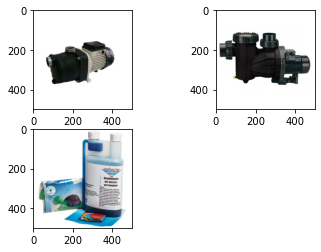

In [151]:
img_2583_1 = plt.imread('images\images\image_train\image_1105831362_product_1857269337.jpg')
img_2583_2 = plt.imread('images\images\image_train\image_1295960377_product_4128438373.jpg')
img_2583_3 = plt.imread('images\images\image_train\image_1268740880_product_3936362802.jpg')
plt.subplot(221).imshow(img_2583_1)
plt.subplot(222).imshow(img_2583_2)
plt.subplot(223).imshow(img_2583_3)

- Jardin et piscine : outillage de jardin - Type code = 2585

In [174]:
data[data['prdtypecode']==2585].head()
#2585 Jardin et piscine : outillage de jardin

,designation,description,productid,imageid,prdtypecode,image_name
162,Tuyau à goutteur incorporé 16 mm x 25 m,Tuyau à goutteur incorporé Caractéristiques -...,2091257012,1125330542,2585,image_1125330542_product_2091257012.jpg
176,Taille-haies sans fil ComfortCut Li-18/60 lvré...,<p><strong>LIVRE SANS BATTERIE NI CHARGEUR</st...,2685362450,1166818974,2585,image_1166818974_product_2685362450.jpg
272,Loft urban pot de fleur rond - 50 cm - bleu vi...,NaN,3397443643,1211397493,2585,image_1211397493_product_3397443643.jpg
275,Trou traversant Pince à sertir multifonction E...,Décapage Artefact Électricien automatique Déca...,4202303891,1314512168,2585,image_1314512168_product_4202303891.jpg
339,C/SEP ARRIERE GHE SUPERCHIEF B737117 AD.IHF,NaN,1657064547,1096608932,2585,image_1096608932_product_1657064547.jpg


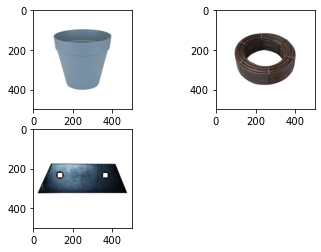

In [153]:
img_2585_1 = plt.imread('images\images\image_train\image_1211397493_product_3397443643.jpg')
img_2585_2 = plt.imread('images\images\image_train\image_1125330542_product_2091257012.jpg')
img_2585_3 = plt.imread('images\images\image_train\image_1096608932_product_1657064547.jpg')
plt.subplot(221).imshow(img_2585_1)
plt.subplot(222).imshow(img_2585_2)
plt.subplot(223).imshow(img_2585_3)

- Livres - Type code = 2705

In [175]:
data[data['prdtypecode']==2705].head()
#2705 = livres

,designation,description,productid,imageid,prdtypecode,image_name
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg
56,Ne Regardez Pas Le Voleur Qui Passe,Depuis quatre ans le mensuel Marie Claire orga...,476383013,1071868057,2705,image_1071868057_product_476383013.jpg
111,Les Crimes Secrets De Napoléon Buonaparte - Fa...,NaN,2537777042,1148188616,2705,image_1148188616_product_2537777042.jpg
141,En Écoutant Tolstoï ; Entretiens Sur La Guerre...,NaN,2142477536,1128331298,2705,image_1128331298_product_2142477536.jpg
144,Les Révélations Du Crime Ou Cambray Et Ses Com...,NaN,1350498866,1075612752,2705,image_1075612752_product_1350498866.jpg


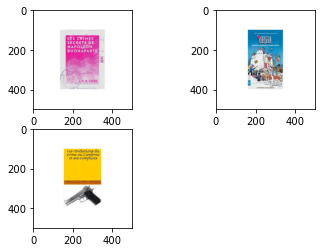

In [154]:
img_2705_1 = plt.imread('images\images\image_train\image_1148188616_product_2537777042.jpg')
img_2705_2 = plt.imread('images\images\image_train\image_1077757786_product_278535884.jpg')
img_2705_3 = plt.imread('images\images\image_train\image_1075612752_product_1350498866.jpg')
plt.subplot(221).imshow(img_2705_1)
plt.subplot(222).imshow(img_2705_2)
plt.subplot(223).imshow(img_2705_3)

- Jeux videos - Type code = 2905

In [176]:
data[data['prdtypecode']==2905].head()
#2905 = jeux videos

,designation,description,productid,imageid,prdtypecode,image_name
148,Motogp 14 - Season Pass (Extension) - Jeu En T...,NOTE : Nécessite le jeu original MotoGP 14 pou...,1711734999,1100084859,2905,image_1100084859_product_1711734999.jpg
287,Snark Busters: High Society - Jeu En Télécharg...,<p>L&#39;amour la jalousie et la vengeance se ...,1711732964,1100077279,2905,image_1100077279_product_1711732964.jpg
611,Crusader Kings Ii: Rajas Of India - Dlc - Jeu ...,NOTE : Nécessite le jeu original <b>Crusader K...,1711734886,1100083529,2905,image_1100083529_product_1711734886.jpg
653,Rage Against The Zombies - Jeu En Téléchargement,NOTE : code d&#39;activation à utiliser exclus...,1869938533,1107916809,2905,image_1107916809_product_1869938533.jpg
672,Last Day Of June - Jeu En Téléchargement,<div> <p><strong>Note :</strong> code d&#39;ac...,3716121480,1236934990,2905,image_1236934990_product_3716121480.jpg


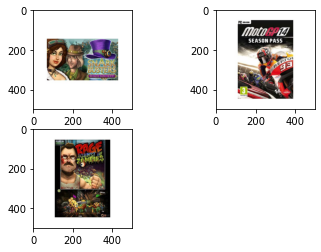

In [155]:
img_2905_1 = plt.imread('images\images\image_train\image_1100077279_product_1711732964.jpg')
img_2905_2 = plt.imread('images\images\image_train\image_1100084859_product_1711734999.jpg')
img_2905_3 = plt.imread('images\images\image_train\image_1107916809_product_1869938533.jpg')
plt.subplot(221).imshow(img_2905_1)
plt.subplot(222).imshow(img_2905_2)
plt.subplot(223).imshow(img_2905_3)

 - Livres - Type code = 10

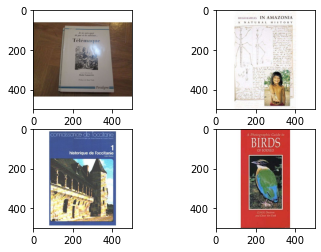

In [112]:
img10_1=plt.imread('images\images\image_train\image_1000076039_product_580161.jpg')
img10_2=plt.imread('images\images\image_train\image_894972867_product_67425128.jpg')
img10_3=plt.imread('images\images\image_train\image_1231548560_product_3652337089.jpg')
img10_4=plt.imread('images\images\image_train\image_1305185189_product_144040625.jpg')
plt.subplot(221).imshow(img10_1)
plt.subplot(222).imshow(img10_2)
plt.subplot(223).imshow(img10_3)
plt.subplot(224).imshow(img10_4)

 - Jeux-vidéos - Type code = 40

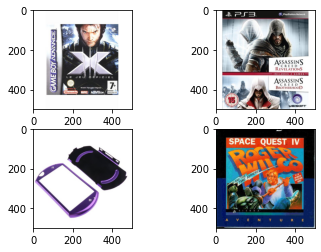

In [115]:
img40_1=plt.imread('images\images\image_train\image_874730792_product_49132716.jpg')
img40_2=plt.imread('images\images\image_train\image_955658863_product_220267350.jpg')
img40_3=plt.imread('images\images\image_train\image_1307786151_product_4105613978.jpg')
img40_4=plt.imread('images\images\image_train\image_857276_product_1170843.jpg')
plt.subplot(221).imshow(img40_1)
plt.subplot(222).imshow(img40_2)
plt.subplot(223).imshow(img40_3)
plt.subplot(224).imshow(img40_4)

 - Matériel Gaming -  Type code = 50

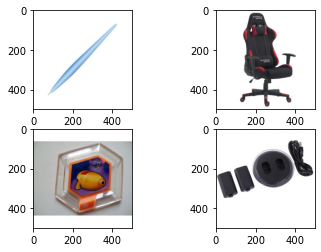

In [116]:
img50_1=plt.imread('images\images\image_train\image_938777978_product_201115110.jpg')
img50_2=plt.imread('images\images\image_train\image_1172463223_product_2792163142.jpg')
img50_3=plt.imread('images\images\image_train\image_972303006_product_264796899.jpg')
img50_4=plt.imread('images\images\image_train\image_1325242825_product_4240794529.jpg')
plt.subplot(221).imshow(img50_1)
plt.subplot(222).imshow(img50_2)
plt.subplot(223).imshow(img50_3)
plt.subplot(224).imshow(img50_4)

 - Console de jeux - Type code = 60

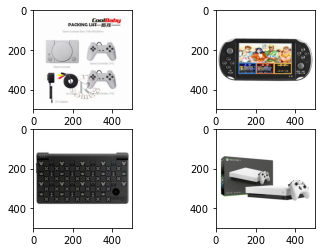

In [117]:
img60_1=plt.imread('images\images\image_train\image_1316147329_product_4200874030.jpg')
img60_2=plt.imread('images\images\image_train\image_1316137053_product_4200873058.jpg')
img60_3=plt.imread('images\images\image_train\image_981082406_product_175428354.jpg')
img60_4=plt.imread('images\images\image_train\image_1315167729_product_2424488821.jpg')
plt.subplot(221).imshow(img60_1)
plt.subplot(222).imshow(img60_2)
plt.subplot(223).imshow(img60_3)
plt.subplot(224).imshow(img60_4)

 - Figurines/Accessoires - Type code = 1140

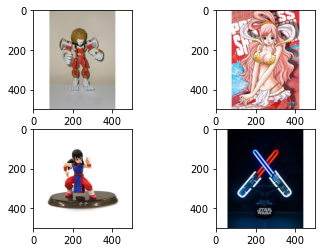

In [118]:
img1140_1=plt.imread('images\images\image_train\image_857195931_product_91015572.jpg')
img1140_2=plt.imread('images\images\image_train\image_981950944_product_285391687.jpg')
img1140_3=plt.imread('images\images\image_train\image_1268908692_product_3944198188.jpg')
img1140_4=plt.imread('images\images\image_train\image_1090968564_product_1565732417.jpg')
plt.subplot(221).imshow(img1140_1)
plt.subplot(222).imshow(img1140_2)
plt.subplot(223).imshow(img1140_3)
plt.subplot(224).imshow(img1140_4)

 - Cartes de collections - Type code = 1160

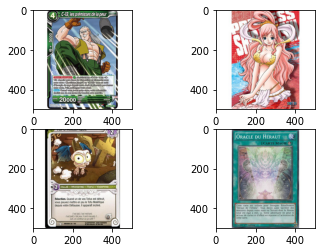

In [119]:
img1160_1=plt.imread('images\images\image_train\image_1202890774_product_3226779852.jpg')
img1160_2=plt.imread('images\images\image_train\image_981950944_product_285391687.jpg')
img1160_3=plt.imread('images\images\image_train\image_872533293_product_117625001.jpg')
img1160_4=plt.imread('images\images\image_train\image_1013129250_product_462402789.jpg')
plt.subplot(221).imshow(img1160_1)
plt.subplot(222).imshow(img1160_2)
plt.subplot(223).imshow(img1160_3)
plt.subplot(224).imshow(img1160_4)

 - Figurines/Accessoires 2 - Type code = 1180

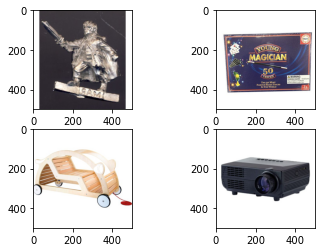

In [27]:
img1180_1=plt.imread('images\images\image_train\image_1110089245_product_1893048509.jpg')
img1180_2=plt.imread('images\images\image_train\image_1215532035_product_3470081674.jpg')
img1180_3=plt.imread('images\images\image_train\image_1099543083_product_1702859654.jpg')
img1180_4=plt.imread('images\images\image_train\image_1218934282_product_3521570766.jpg')
plt.subplot(221).imshow(img1180_1)
plt.subplot(222).imshow(img1180_2)
plt.subplot(223).imshow(img1180_3)
plt.subplot(224).imshow(img1180_4)

 - Jouets enfants - Type code = 1280

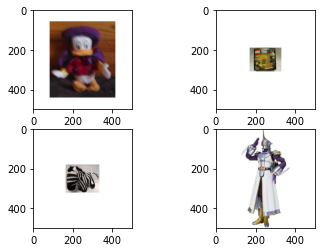

In [28]:
img1280_1=plt.imread('images\images\image_train\image_457047496_product_50418756.jpg')
img1280_2=plt.imread('images\images\image_train\image_1240241973_product_3745176750.jpg')
img1280_3=plt.imread('images\images\image_train\image_1155221058_product_2638944193.jpg')
img1280_4=plt.imread('images\images\image_train\image_987439078_product_294323290.jpg')
plt.subplot(221).imshow(img1280_1)
plt.subplot(222).imshow(img1280_2)
plt.subplot(223).imshow(img1280_3)
plt.subplot(224).imshow(img1280_4)

 - Jeux de sociétés - Type code = 1281

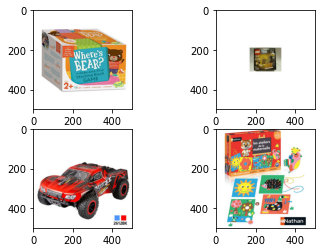

In [29]:
img1281_1=plt.imread('images\images\image_train\image_1204199842_product_3287127001.jpg')
img1281_2=plt.imread('images\images\image_train\image_1240241973_product_3745176750.jpg')
img1281_3=plt.imread('images\images\image_train\image_1275488940_product_4006488750.jpg')
img1281_4=plt.imread('images\images\image_train\image_1318106444_product_618925700.jpg')
plt.subplot(221).imshow(img1281_1)
plt.subplot(222).imshow(img1281_2)
plt.subplot(223).imshow(img1281_3)
plt.subplot(224).imshow(img1281_4)

 - Jouets - Type code = 1300

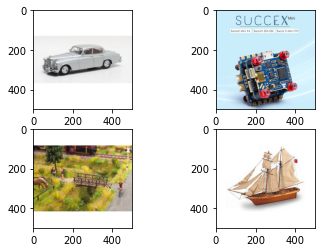

In [30]:
img1300_1=plt.imread('images\images\image_train\image_1305524791_product_4165984010.jpg')
img1300_2=plt.imread('images\images\image_train\image_1268468591_product_3951008445.jpg')
img1300_3=plt.imread('images\images\image_train\image_1019306612_product_516394759.jpg')
img1300_4=plt.imread('images\images\image_train\image_913623620_product_158007233.jpg')
plt.subplot(221).imshow(img1300_1)
plt.subplot(222).imshow(img1300_2)
plt.subplot(223).imshow(img1300_3)
plt.subplot(224).imshow(img1300_4)

 - Jeux de société(fléchettes,billard) - Type code = 1301

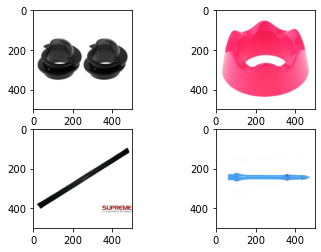

In [31]:
img1301_1=plt.imread('images\images\image_train\image_1304659418_product_4144682755.jpg')
img1301_2=plt.imread('images\images\image_train\image_1297206584_product_4110365772.jpg')
img1301_3=plt.imread('images\images\image_train\image_1272593273_product_3990411027.jpg')
img1301_4=plt.imread('images\images\image_train\image_1094847157_product_1629867416.jpg')
plt.subplot(221).imshow(img1301_1)
plt.subplot(222).imshow(img1301_2)
plt.subplot(223).imshow(img1301_3)
plt.subplot(224).imshow(img1301_4)

 - Jeux/Accessoires/Vêtement -  Type code = 1302

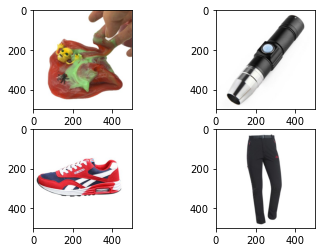

In [32]:
img1302_1=plt.imread('images\images\image_train\image_1276030225_product_4010224699.jpg')
img1302_2=plt.imread('images\images\image_train\image_1324096459_product_4236042093.jpg')
img1302_3=plt.imread('images\images\image_train\image_1324013139_product_4235887823.jpg')
img1302_4=plt.imread('images\images\image_train\image_1323337722_product_4231757820.jpg')
plt.subplot(221).imshow(img1302_1)
plt.subplot(222).imshow(img1302_2)
plt.subplot(223).imshow(img1302_3)
plt.subplot(224).imshow(img1302_4)

 - Puériculture - Type code = 1320

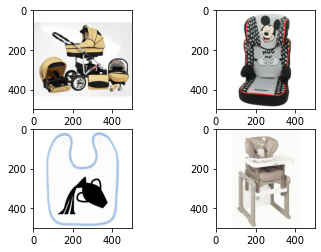

In [146]:
img1320_1=plt.imread('images\images\image_train\image_1102363799_product_845432910.jpg')
img1320_2=plt.imread('images\images\image_train\image_1068285873_product_1191766690.jpg')
img1320_3=plt.imread('images\images\image_train\image_1192148749_product_3122641017.jpg')
img1320_4=plt.imread('images\images\image_train\image_1264360606_product_3887674139.jpg')
plt.subplot(221).imshow(img1320_1)
plt.subplot(222).imshow(img1320_2)
plt.subplot(223).imshow(img1320_3)
plt.subplot(224).imshow(img1320_4)

Nous allons poursuivre notre exploration de données images dans un nouveau Notebook intitulé "1.Exploration et Audit des données (suite)", dans lequel nous allons afficher les images moyennes de chaque catégorie.